# Project Performance Analysis

This notebook contains an exploratory data analysis (EDA) and predictive modeling on a synthetic dataset representing project performance metrics. The goal is to explore relationships between project attributes and outcomes such as delays and completion times, and to build models to predict whether a project is likely to experience delays.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset

# Adjust the path if necessary
file_path = 'project_performance_dataset.csv'
df = pd.read_csv(file_path, parse_dates=['StartDate','EndDate'])
print('Dataset shape:', df.shape)
df.head()


Dataset shape: (200, 13)


,ProjectID,StartDate,EndDate,BaseDurationDays,TeamSize,Budget,ComplexityScore,RiskScore,DelayFlag,DelayDays,CompletionTimeDays,StakeholderEngagement,Domain
0,PRJ0052,2024-07-12,2024-11-28,139,10,428910.38,6,9,0,0,139,5,HR
1,PRJ0093,2023-03-19,2023-10-17,211,6,137471.02,1,5,1,1,212,4,Marketing
2,PRJ0015,2023-05-04,2024-05-05,342,2,235109.26,9,6,1,25,367,5,Operations
3,PRJ0072,2023-03-16,2023-04-22,30,4,364780.49,1,4,1,7,37,8,HR
4,PRJ0061,2023-05-17,2024-07-28,348,9,112258.89,5,10,1,90,438,10,IT


In [2]:
# Display summary statistics and check for missing values
print(df.describe(include='all'))
print('Missing values per column:')
print(df.isnull().sum())


       ProjectID            StartDate              EndDate  BaseDurationDays  \
count        200                  200                  200        200.000000   
unique        87                  175                  183               NaN   
top      PRJ0062  2024-07-26 00:00:00  2023-08-20 00:00:00               NaN   
freq          10                    3                    4               NaN   
first        NaN  2023-01-08 00:00:00  2023-03-20 00:00:00               NaN   
last         NaN  2024-12-30 00:00:00  2026-02-17 00:00:00               NaN   
mean         NaN                  NaN                  NaN        198.665000   
std          NaN                  NaN                  NaN         95.391617   
min          NaN                  NaN                  NaN         30.000000   
25%          NaN                  NaN                  NaN        116.750000   
50%          NaN                  NaN                  NaN        194.500000   
75%          NaN                  NaN   

/tmp/ipykernel_412/802973661.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
/tmp/ipykernel_412/802973661.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


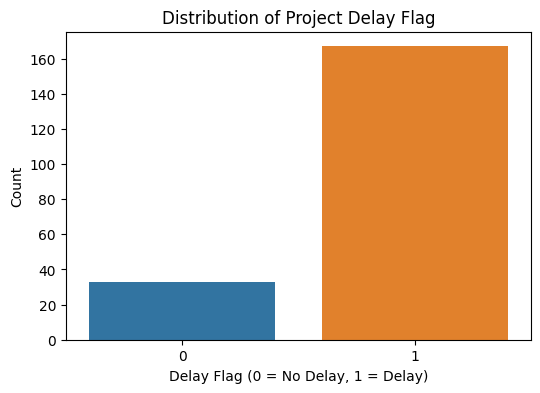

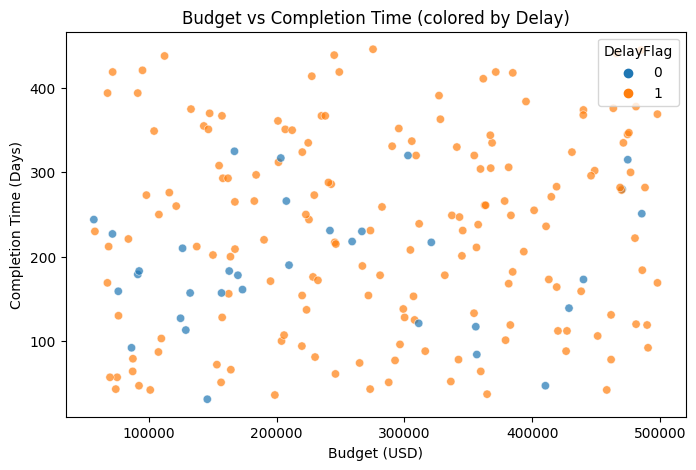

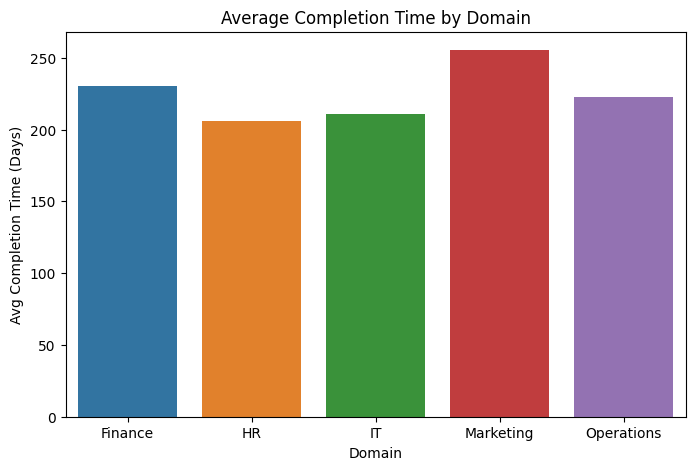

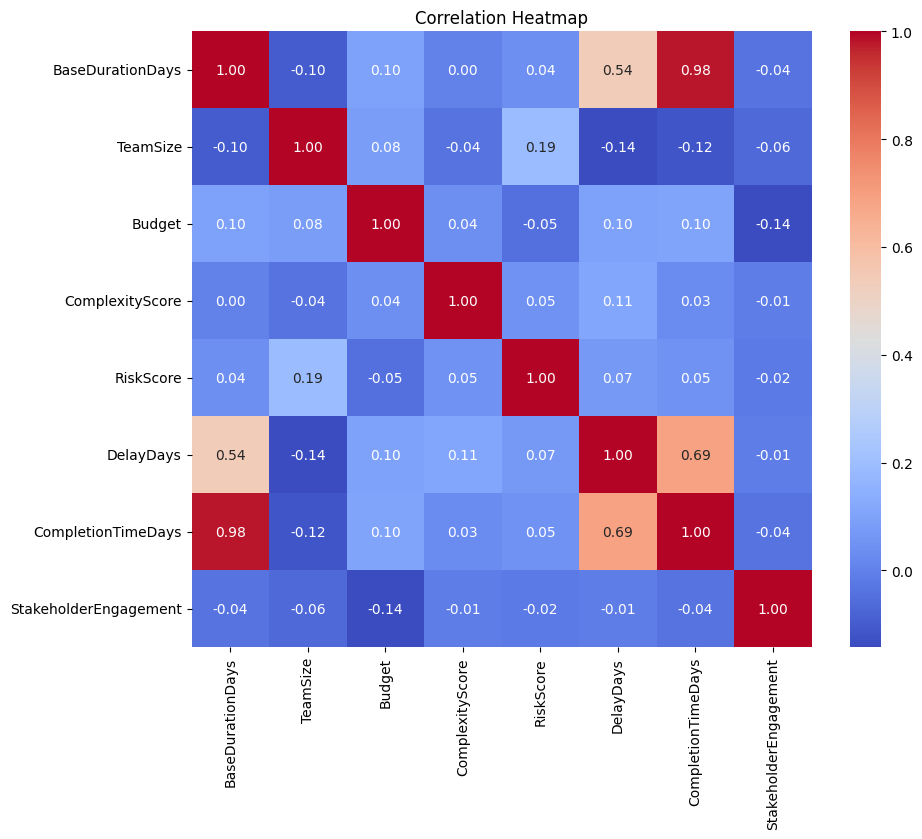

In [3]:

# Plot distribution of DelayFlag
plt.figure(figsize=(6,4))
sns.countplot(x='DelayFlag', data=df)
plt.title('Distribution of Project Delay Flag')
plt.xlabel('Delay Flag (0 = No Delay, 1 = Delay)')
plt.ylabel('Count')
plt.show()

# Scatter plot: Budget vs CompletionTimeDays colored by DelayFlag
plt.figure(figsize=(8,5))
sns.scatterplot(x='Budget', y='CompletionTimeDays', hue='DelayFlag', data=df, alpha=0.7)
plt.title('Budget vs Completion Time (colored by Delay)')
plt.xlabel('Budget (USD)')
plt.ylabel('Completion Time (Days)')
plt.show()

# Bar plot: Average completion time by domain
plt.figure(figsize=(8,5))
mean_completion_by_domain = df.groupby('Domain')['CompletionTimeDays'].mean().reset_index()
sns.barplot(x='Domain', y='CompletionTimeDays', data=mean_completion_by_domain)
plt.title('Average Completion Time by Domain')
plt.xlabel('Domain')
plt.ylabel('Avg Completion Time (Days)')
plt.show()

# Correlation heatmap for numeric variables
plt.figure(figsize=(10,8))
corr = df[['BaseDurationDays','TeamSize','Budget','ComplexityScore','RiskScore','DelayDays','CompletionTimeDays','StakeholderEngagement']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Logistic Regression Accuracy: 0.825
Confusion Matrix:
[[ 0  7]
 [ 0 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        33

    accuracy                           0.82        40
   macro avg       0.41      0.50      0.45        40
weighted avg       0.68      0.82      0.75        40

Random Forest Accuracy: 0.825
Confusion Matrix:


/opt/pyvenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyvenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyvenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 1  6]
 [ 1 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.84      0.97      0.90        33

    accuracy                           0.82        40
   macro avg       0.67      0.56      0.56        40
weighted avg       0.78      0.82      0.78        40

Feature Importance:
BaseDurationDays         0.211173
Budget                   0.206585
ComplexityScore          0.175966
TeamSize                 0.155165
RiskScore                0.134834
StakeholderEngagement    0.116277
dtype: float64


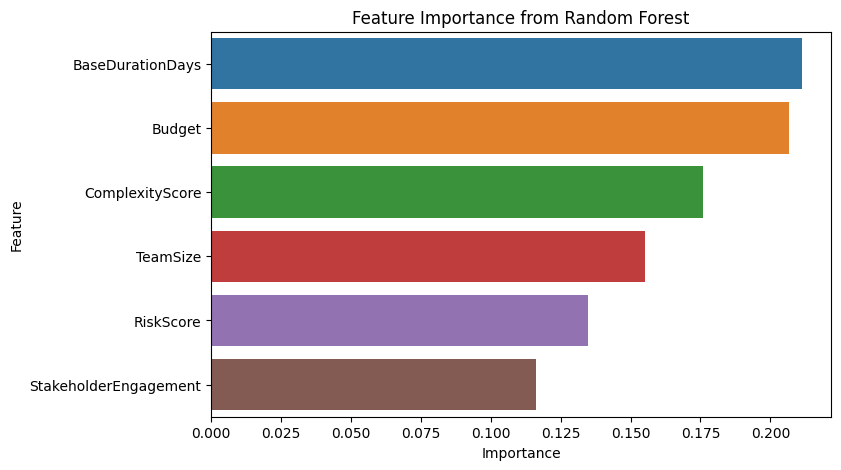

In [4]:
# Prepare features and target
target = df['DelayFlag']
features = df[['BaseDurationDays','TeamSize','Budget','ComplexityScore','RiskScore','StakeholderEngagement']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
preds_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, preds_lr)
print('Logistic Regression Accuracy:', acc_lr)
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds_lr))
print('Classification Report:')
print(classification_report(y_test, preds_lr))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, preds_rf)
print('Random Forest Accuracy:', acc_rf)
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds_rf))
print('Classification Report:')
print(classification_report(y_test, preds_rf))

# Feature importance from Random Forest
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=features.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feat_importance)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Conclusion

This analysis of a synthetic project performance dataset explored key factors that contribute to project delays and durations. We performed exploratory data analysis to visualize distributions and relationships between variables such as budget and completion time. Using logistic regression and random forest models, we built predictive models to classify whether a project would experience a delay based on its characteristics. The random forest model provided insights into feature importance, highlighting which factors most strongly influence project delays. 